En esta notebook aprenderás qué es una regresión lineal y cómo funciona con un ejemplo con Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

El conjunto de datos "Housing" del repositorio de aprendizaje automático de la Universidad de California en Irvine (UCI) es uno de los conjuntos de datos más utilizados en la enseñanza de técnicas de regresión y análisis de datos.

El conjunto de datos contiene 506 registros y 14 atributos, que incluyen información como la tasa de impuesto a la propiedad, la proporción de habitaciones por vivienda ocupada, la tasa de criminalidad per cápita, entre otros.

- ***CRIM***: tasa de delincuencia per cápita por ciudad

- ***ZN***: proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

- ***INDUS***: proporción de acres de negocios no minoristas por ciudad

- ***CHAS***: variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

- ***NOX***: concentración de óxidos nítricos (partes por cada 10 millones)

- ***RM***: número promedio de habitaciones por vivienda

- ***AGE***: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

- ***DIS***: distancias ponderadas a cinco centros de empleo de Boston

- ***RAD***: índice de accesibilidad a carreteras radiales

- ***TAX***: tasa de impuesto sobre la propiedad de valor total por cada $10,000

- ***PTRATIO***: relación alumno-maestro por ciudad

- ***B***: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad

- ***LSTAT***: % de estatus social bajo de la población

- ***MEDV***: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

In [4]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
    header=None, # especificamos que el dataset no tiene headers.
    sep='\s+') # especificamos que la separacion esta hecha por espacios y no por comas.

df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Análisis de datos para tu primera regresión lineal
Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de Seaborn con las siguientes variables objetivos:

DIS: distancias ponderadas a cinco centros de empleo de Boston
INDUS: proporción de acres de negocios no minoristas por ciudad
CRIM: tasa de delincuencia per cápita por ciudad
RM: número promedio de habitaciones por vivienda
MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

### Análisis visual


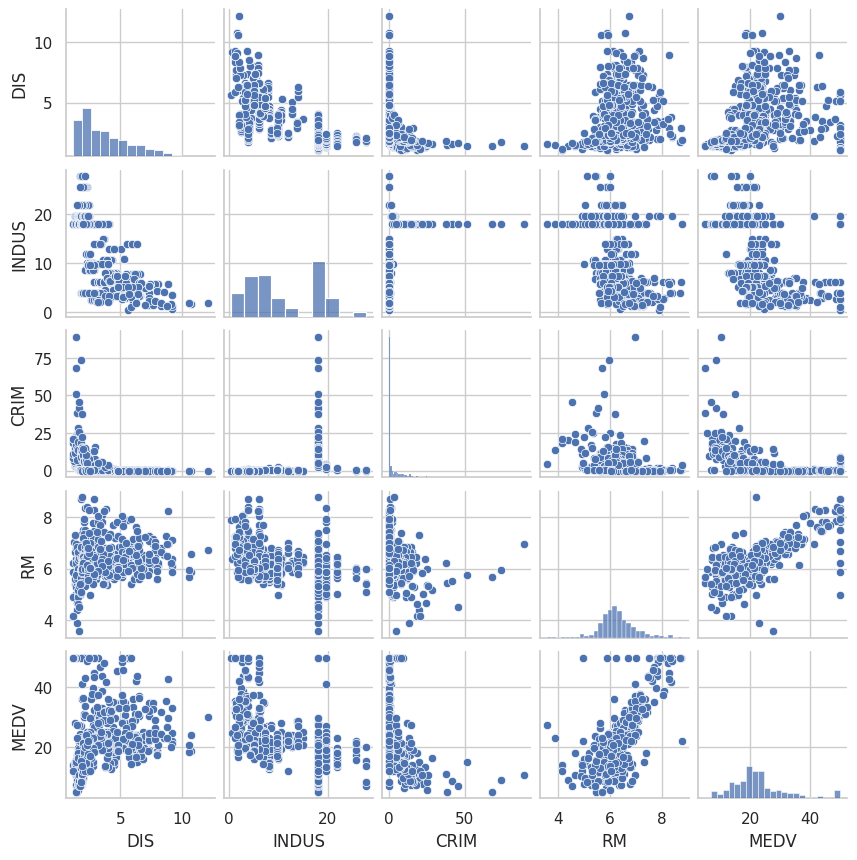

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["DIS", "INDUS", "CRIM", "RM","MEDV"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(df[cols], height=1.75);

### Insight

Al observar la distribución de la variable MEDV, podemos ver que se asemeja a una distribución normal con algunos valores atípicos. Esto es importante porque MEDV es la variable objetivo que se desea predecir. Si la variable objetivo sigue una distribución normal, es más fácil y preciso construir un modelo que pueda predecir su valor.

Además, la variable RM también muestra un similitud a una distribución normal. En este caso, se puede observar una tendencia lineal positiva entre RM y MEDV, lo que sugiere que a medida que aumenta el valor de RM, también aumenta el valor de MEDV. Por lo tanto, se podría utilizar esta relación para construir un modelo de regresión lineal que prediga el valor de MEDV en función de RM.

### Análisis numérico

Al realizar un análisis visual de un conjunto de datos, se obtienen ideas generales de las relaciones entre las variables y patrones. Sin embargo, es importante complementarlo con un análisis numérico para confirmar que nuestras suposiciones para confirmar si son correctas.

El análisis numérico puede incluir el cálculo de medidas estadísticas como la media, la mediana y la desviación estándar, así como la realización de pruebas de hipótesis y la evaluación de correlaciones entre variables.

En este caso, se observa una relación aparentemente lineal, por lo cual es necesario calcular la correlación numérica para determinar si es significativa y cuánto es su fuerza. Asimismo, en cuanto a los valores atípicos, es necesario analizar numéricamente su impacto en las medidas estadísticas y determinar si deben ser excluidos o si representan información importante.

<Axes: >

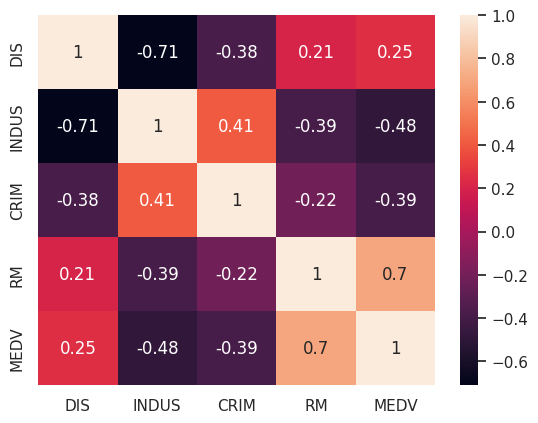

In [6]:
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

### Insight

- En particular, se observó que la correlación entre las variables RM y MEDV es positiva y relativamente alta en comparación con las demás variables. Esto significa que a medida que aumenta el número promedio de habitaciones por vivienda (RM), también tiende a aumentar el valor mediano de las viviendas ocupadas por sus propietarios (MEDV).

- La correlación entre INDUS y DIS es negativa, es decir, esto podría indicar que a medida que una ciudad tiene una mayor cantidad de negocios no minoristas, es más probable que se encuentre cerca de los centros de empleo de Boston.

- la correlación entre valor mediano de las viviendas ocupadas por sus propietarios (MEDV) y la proporción de acres de negocios no minoristas por ciudad (INDUS) es de -0.483. Esta correlación negativa sugiere que a medida que aumenta la proporción de acres de negocios no minoristas por ciudad (INDUS), el valor mediano de viviendas ocupadas por el propietario (MEDV) tiende a disminuir.

### Entrenando un modelo de regresión lineal con scikit-learn

####¿Que es un modelo de regresion lineal?
Un modelo de regresión lineal se utiliza para encontrar la línea recta que mejor se ajusta a los datos y que se puede utilizar para hacer predicciones sobre nuevos datos. La fórmula incluye términos de intercepción y coeficiente de regresión, y el objetivo del modelo es minimizar la suma de los cuadrados de los errores para obtener la mejor línea recta.

Ahora realizaremos un modelo de regresión lineal simple para predecir el precio de una casa (variable dependiente) en función del promedio de habitaciones (variable independiente).

La idea del siguiente ejercicio es ver como se utiliza un modelo de regresión lineal simple para predecir la mediana del precio de las casas en Boston a partir del número promedio de habitaciones.



In [7]:
# Guardamos los datos de interes en una variable x e y
x = df['RM'].values.reshape(-1,1) # variable independiente
y = df['MEDV'].values.reshape(-1,1) # variable dependiente

In [8]:
from sklearn.preprocessing import StandardScaler

# instanciamos el modelo de escalamiento
sc_x = StandardScaler()
sc_y = StandardScaler()

In [9]:
# estandarizamos los datos z=(x-u)/std
x_standard = sc_x.fit_transform(x)
y_standard = sc_y.fit_transform(y)

In [10]:
from sklearn.linear_model import LinearRegression

# Instanciamos y ajustamos el modelo de regresión lineal
slr = LinearRegression() # Standar Linear Regression (slr)
slr.fit(x_standard,y_standard)

LinearRegression()

Text(0, 0.5, 'Mediana del precio de las casas x1000 (MEDV)')

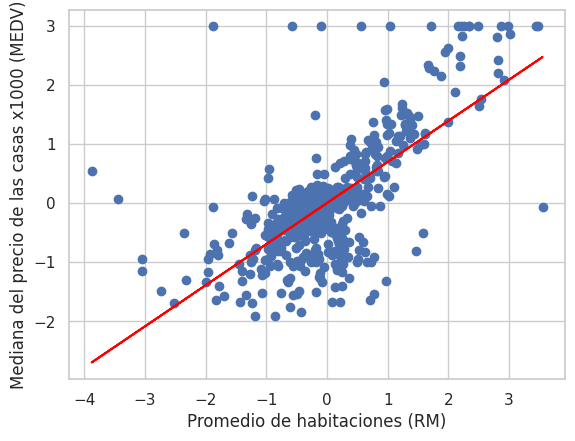

In [11]:
# Graficamos los datos estandarizados
plt.scatter(x_standard, y_standard)
# Graficamos la linea de regresion ajustada
plt.plot(x_standard, slr.predict(x_standard), color='red')

plt.xlabel("Promedio de habitaciones (RM)")
plt.ylabel("Mediana del precio de las casas x1000 (MEDV)")

In [12]:
import numpy as np

# Representamos el numero de habitaciones de la casa que queremos predecir
num_habitaciones = 5

# Estandarizamos sc_x para predecir el predio de la casa
num_habitaciones_standard = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

# Usamos la transformada inversa en el resultado para volver a la escala original
result = sc_y.inverse_transform(slr.predict(num_habitaciones_standard))
print("El precio de una casa con 5 habitaciones en Boston es de", result*1000)

El precio de una casa con 5 habitaciones en Boston es de [[10839.92412946]]


### ¿Cómo funciona la regresión lineal?

#### ¿Qué es la regresión lineal?
La regresión lineal es un algoritmo de aprendizaje supervisado utilizado para modelar la relación entre una variable dependiente (Y) y una o más variables independientes
(X). El objetivo del modelo es encontrar la línea recta que mejor se ajusta a los datos y utilizarla para hacer predicciones sobre nuevos datos.

#### Seleccionar el modelo adecuado

El modelo de regresión lineal simple es el más sencillo y se utiliza cuando solo se tiene una variable independiente
(X). Cuando se tienen más de una variable independiente, se utiliza el modelo de regresión lineal múltiple.

#### Definir la hipótesis:

La hipótesis del modelo de regresión lineal es que existe una relación lineal entre la variable dependiente y la variable independiente, si existe una relación lineal entre las variables, se espera que los puntos se agrupen alrededor de una línea recta. Esta relación se puede expresar mediante la siguiente ecuación:

y=w0+w1x+ε

donde:

* y: es la variable dependiente o variable a predecir.
* x: es la variable independiente o variable explicativa.
* w0: es el término de intercepción, que representa el valor de y cuando x es igual a cero.
* w1: es el coeficiente de regresión, que representa la pendiente de la línea recta.
* e: es el término de error, que representa la diferencia entre el valor observado y el valor predicho.

En el contexto del inteligencia artificial w0 y w1 conocidos como w0 y w1 corresponden a los pesos del modelo, los pesos son valores que se utilizan para determinar la importancia relativa de cada variable de entrada en la predicción de la variable de salida.

### ¿Cuándo utilizar un modelo de regresión lineal?
***Preguntas clave para determinar si la regresión lineal es adecuada***

¿Tengo una variable dependiente numérica que quiero predecir a partir de una variable independiente numérica?

- Si la variable dependiente (Y) que queremos predecir es numérica y la variable independiente (X) que usamos para hacer la predicción también es numérica, entonces un modelo de regresión lineal podría ser una buena opción para resolver el problema.

¿Cuento con una gran cantidad de variables y / o variables categóricas con muchos niveles?

- Si hay variables categóricas con muchos niveles, es posible que la regresión lineal no sea el modelo más adecuado para el análisis, ya que puede haber dificultades en la interpretación de los resultados. En este caso, podría ser más apropiado utilizar modelos de regresión logística o modelos de árbol de decisión para variables categóricas con muchos niveles.

Recomendaciones para determinar si la regresión lineal
Probar otros modelos

- La regresión lineal puede no ser el mejor modelo para todas las situaciones, por lo que siempre es recomendable explorar otros modelos, como la regresión logística, el árbol de decisión o el Random Forest, entre otros.

Reducir las variables

Si tienes muchas variables independientes, es posible que tu modelo sufra de overfitting o que algunas variables no sean relevantes para predecir la variable dependiente. En ese caso, se recomienda realizar un análisis de correlación y eliminar aquellas variables con baja correlación con la variable dependiente.

Multicolinealidad

La multicolinealidad ocurre cuando hay una alta correlación entre dos o más variables independientes, por ejemplo tener la variable de peso en kg y peso en lbs provocaria una multicolinealidad. Esto puede afectar negativamente el modelo de regresión lineal, por lo que se recomienda identificar y eliminar las variables redundantes.

No predecir fuera del dominio de la variable independiente

Es importante tener en cuenta el dominio de la variable independiente al realizar predicciones. Si se intenta predecir fuera de este rango, los resultados pueden ser poco confiables o incluso absurdos. Es importante

###Función de pérdida y optimización: mínimos cuadrados
El MSE (Mean Squared Error), o Error Cuadrático Medio, es una medida comúnmente utilizada para evaluar el rendimiento de modelos de regresión. El MSE es el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.

Para calcular el MSE, puedes seguir los siguientes pasos:

Calcula el error al cuadrado (la diferencia entre la predicción del modelo y el valor real, al cuadrado) para cada punto de datos.
Suma todos los errores al cuadrado.
Divide la suma de errores al cuadrado por el número de puntos de datos para obtener el MSE.
La fórmula para calcular el MSE es:

MSE= 1/n * Σ(yi-y)^2


Donde:

n: es el número de puntos de datos
yi: es el valor real del i-ésimo punto de datos
y: es la predicción del modelo para el i-ésimo punto de datos.
Hagamos el paso a paso de como calcular el MSE con un conjunto de entrada aleatorio ascendente:

Teniendo en cuenta la formula del Error Cuadrático Medio, requerimos saber el valor de y=mx+b


In [13]:
import numpy as np

# Se definen los datos de entrada
x=np.array([1.2, 2,3.2,2.5,5,6,4,8])
y=np.array([2,3,3.4,3.1,4,4.7,3.8,7])

# Se calcula el tamaño del conjunto de datos
n = len(x)

In [14]:
# Se calculan las sumas de los productos de los elementos de x e y, x^2, y las sumas de los elementos de x e y
xy = np.sum((x*y),axis=0)
x_2 = np.sum((x**2), axis=0)
sum_x = np.sum(x, axis=0)
sum_y = np.sum(y, axis=0)

In [15]:
# Se define la función para calcular la pendiente de la recta de regresión lineal
def m():
    numerador = (n*xy) - (sum_x * sum_y)
    denominador = (n*x_2) - (sum_x)**2
    return np.divide(numerador,denominador)

# Se calcula la pendiente m
m = m()

In [16]:
# Se define la función para calcular la intercepción de la recta de regresión lineal
def b():
    numerador = sum_y - (m * sum_x)
    denominador = n
    return np.divide(numerador, denominador)

# Se calcula la intercepción b
b = b()

In [17]:
# Se define la función para calcular la predicción y' utilizando la recta de regresión lineal
def f():
    return (m*x)+b

In [18]:
# Se calcula la predicción y'
y_prima = f()
# Se calcula la suma de las predicciones y'

sum_y_prima = np.sum(y_prima, axis=0)

In [19]:
# Se define la función para calcular el MSE
def MSE():
    return (1/n) * np.sum((y - y_prima)**2, axis=0)

# Se calcula el MSE
mse = MSE()

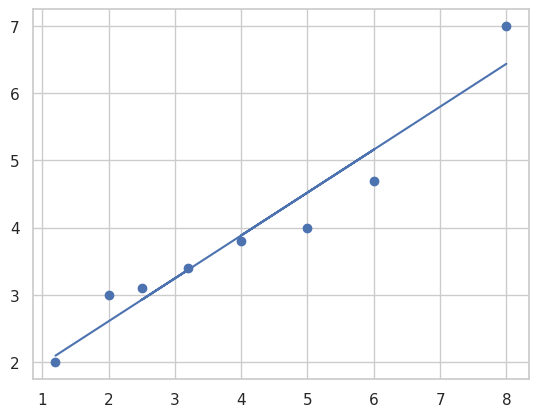

In [20]:
plt.plot(x,y_prima)
plt.scatter(x,y)

In [21]:
df_mse = pd.DataFrame.from_dict({
    "x"       :x,
    "y"       :y,
    "y_prima" :y_prima,
    "xy"      :xy,
    "x_2"     :x_2,
    "sum_x"   :sum_x,
    "sum_y"   :sum_y,
    "m"       :m,
    "b"       :b,
    "mse"     :mse
},)
df_mse

,x,y,y_prima,xy,x_2,sum_x,sum_y,m,b,mse
0,1.2,2.0,2.094815,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
1,2.0,3.0,2.605720,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
2,3.2,3.4,3.372078,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
3,2.5,3.1,2.925036,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
4,5.0,4.0,4.521614,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
5,6.0,4.7,5.160246,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
6,4.0,3.8,3.882983,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379
7,8.0,7.0,6.437508,146.43,162.93,31.9,31.0,0.638631,1.328457,0.125379


Evaluando el modelo: R^2 y MSE
El propósito de evaluar un modelo de regresión es determinar qué tan bien se ajusta el modelo a los datos de entrenamiento y cómo de bien generaliza a nuevos datos. Esto es importante porque un modelo que se ajusta muy bien a los datos de entrenamiento puede tener un sobreajuste (overfitting). Por otro lado, un modelo que no se ajusta bien a los datos de entrenamiento puede subestimar la relación entre las variables y no ser capaz de predecir de manera efectiva los valores de la variable objetivo.

El error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado)  son dos métricas comunes que se usan para evaluar el rendimiento de un modelo de regresión.

El error cuadrático medio (MSE)
El error cuadrático medio (MSE) es otra métrica utilizada para evaluar modelos de regresión. El MSE mide el promedio de los cuadrados de los errores de predicción entre el modelo y los valores reales en el conjunto de datos. En otras palabras, el MSE calcula la diferencia cuadrática promedio entre los valores predichos por el modelo y los valores reales observados. Cuanto menor sea el valor de MSE, mejor será el ajuste del modelo a los datos.

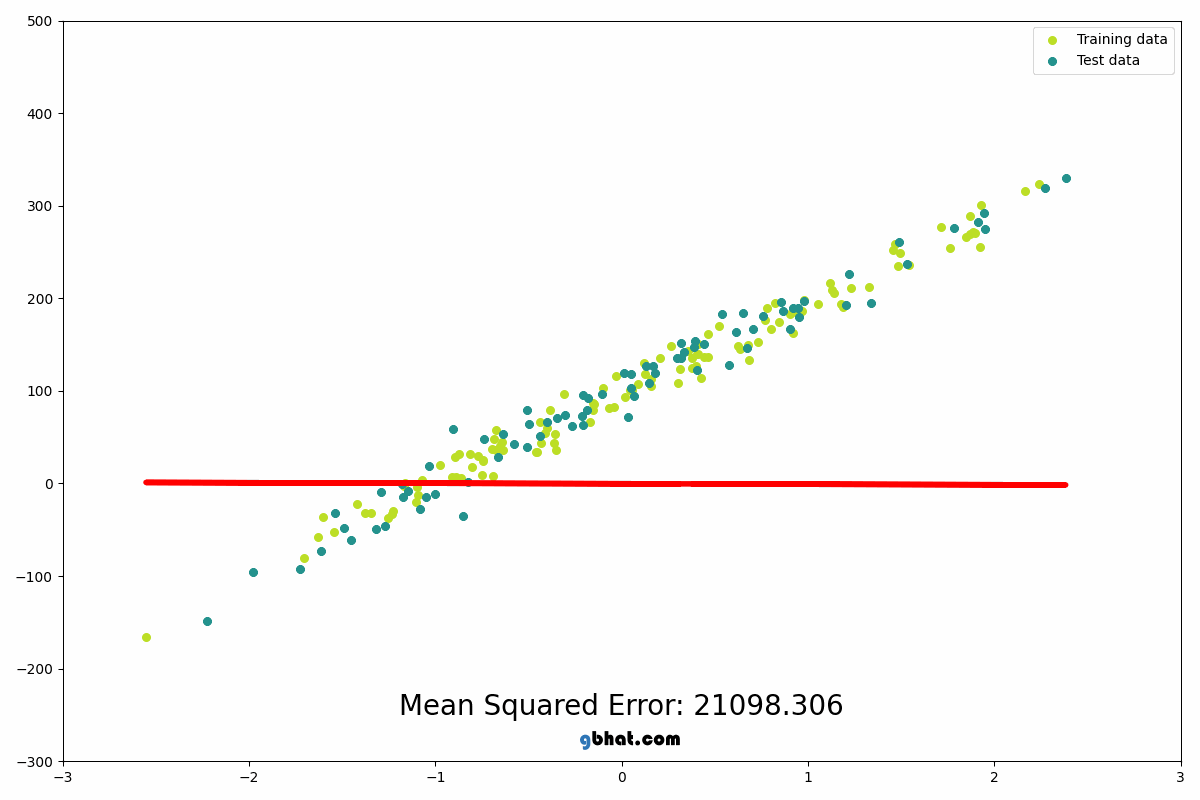

### El coeficiente de determinación

El coeficiente de determinación, denotado por R-cuadrado o R^2, es una métrica que indica qué porcentaje de la variabilidad en la variable dependiente puede ser explicada por la variable independiente en un modelo de regresión lineal. Es decir, R-cuadrado mide la calidad del ajuste del modelo a los datos. El valor de R-cuadrado varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna de la variabilidad en la variable dependiente y 1 indica que el modelo explica toda la variabilidad. Por lo tanto, cuanto mayor sea el valor de R-cuadrado, mejor será el ajuste del modelo a los datos.

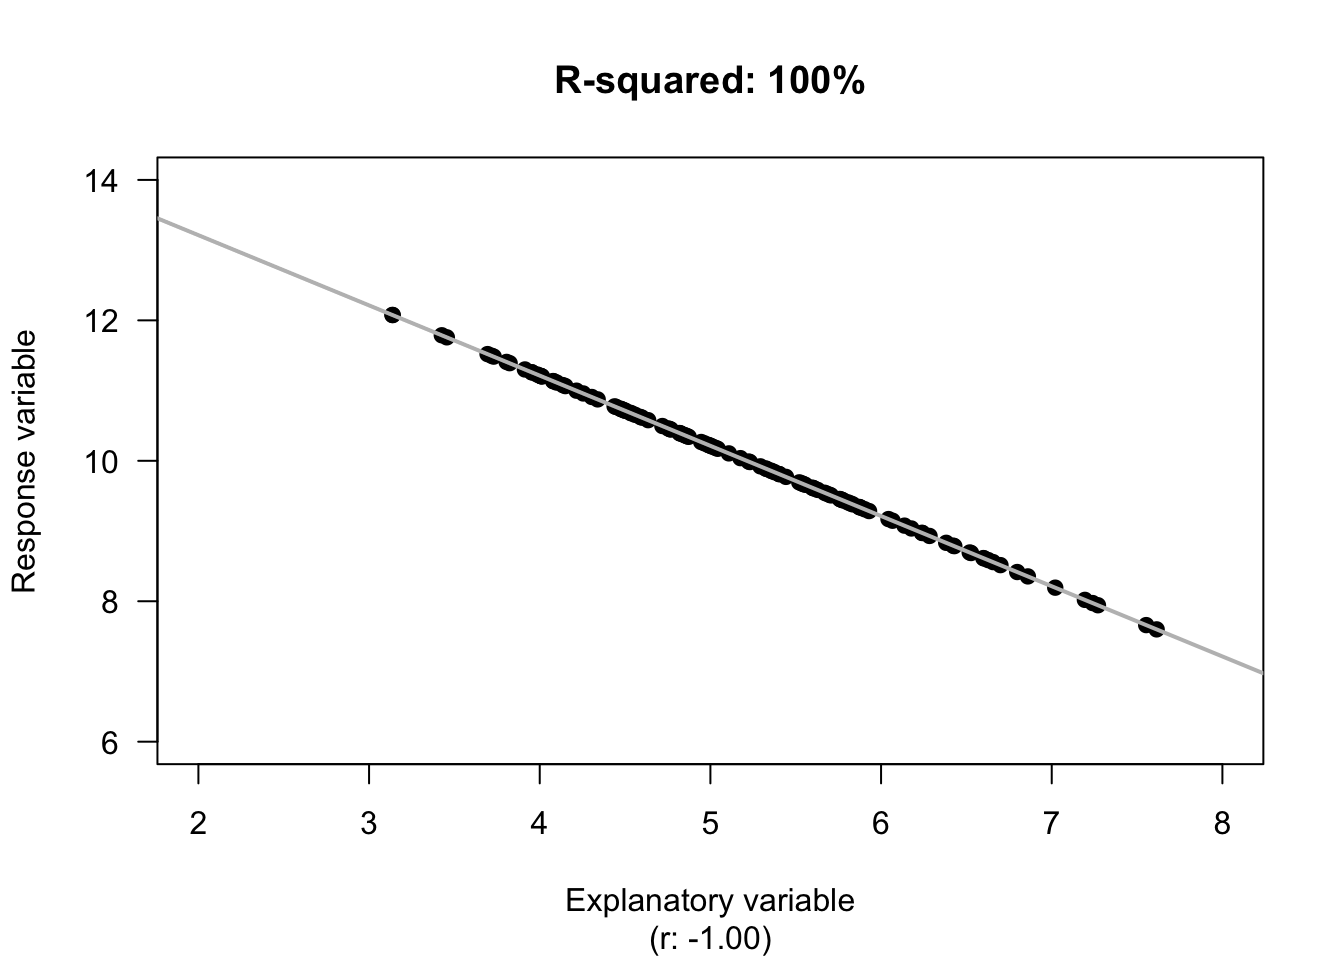

### Otras metricas importantes a conciderar

- R ajustada (R² ajustada): La R ajustada es una medida de la cantidad de variación en la variable dependiente que es explicada por la variable independiente(s) en el modelo. A diferencia de la R², la R ajustada penaliza por la inclusión de variables irrelevantes o redundantes en el modelo.

- Error máximo: Esta métrica mide el mayor error absoluto en las predicciones del modelo. Es útil para identificar observaciones que están lejos de la línea de regresión y que pueden estar afectando la calidad del modelo.

- Error absoluto promedio (MAE): El MAE mide el promedio de los errores absolutos en las predicciones del modelo. Es útil para tener una idea de la magnitud promedio de los errores de predicción.

- Mediana del los errores absolutos: La mediana del error absoluto es una medida de la centralidad que indica el valor de la predicción que tiene la mitad de los errores por debajo y la otra mitad por encima. Es útil cuando los datos están sesgados y la media no es una medida representativa de los errores.

- Raíz del promedio de los errores cuadrados (RMSE): El RMSE mide el error promedio de las predicciones del modelo en unidades de la variable dependiente. Es una medida común para evaluar la precisión de los modelos de regresión.

- Varianza explicada: La varianza explicada mide la proporción de la varianza total en la variable dependiente que es explicada por la variable independiente(s) en el modelo. Es útil para evaluar la calidad del ajuste del modelo y comparar modelos diferentes.

###La gráfica de residuales
La gráfica de residuales es una herramienta de diagnóstico que se utiliza para evaluar la calidad del ajuste de un modelo de regresión lineal. En esta gráfica, se grafican los residuos del modelo (la diferencia entre los valores observados y los valores predichos por el modelo) en el eje vertical y los valores predichos por el modelo en el eje horizontal.

Una buena gráfica de residuales debería mostrar una distribución aleatoria de los residuos alrededor del valor cero en el eje vertical. Esto indicaría que el modelo se ajusta bien a los datos y que los residuos no tienen patrones discernibles. Si hay patrones en la distribución de los residuos, como una curva en forma de U o una relación no lineal, esto sugiere que el modelo no se ajusta bien a los datos.


##Regresión lineal multivariable

La regresión lineal multivariable es una técnica estadística utilizada para modelar la relación entre una variable de respuesta
(Y) y dos o más variables predictoras o independientes
(X). Esta técnica se utiliza para predecir la variable de respuesta basada en las variables predictoras.

La regresión lineal multivariable es útil cuando queremos determinar la relación entre múltiples variables independientes y una variable dependiente. Por ejemplo, se puede utilizar para predecir el precio de una casa basado en su tamaño, número de habitaciones, ubicación, etc.

La fórmula para la regresión lineal multivariable es:
Y=w0+w1X1+w2X2+...+wnxn

Donde
Y: es la variable de respuesta,
X1,X2,...,Xn son las variables predictoras,
w0 es la intersección o el término constante, y
w1,w2,...,wn son los coeficientes que representan la relación entre las variables predictoras y la variable de respuesta.

Para encontrar los valores de los coeficientes
w1,w2,...,wnyw0, se utiliza un proceso llamado "mínimos cuadrados" que minimiza la suma de los errores al cuadrado entre las observaciones y las predicciones.

La regresión lineal multivariable es ampliamente utilizada en la investigación científica, la econometría, el análisis de datos y la toma de decisiones en negocios y finanzas.

###Resolviendo una regresión lineal multivariable
Volveremos a trabajar con el dataset "Housing" para poder predecir el valor medio de las viviendas en diferentes zonas de Boston (MEDV).

Nos ayudaremos con los resultados obtenidos del análisis previo de en el análisis de correlación.

En particular, buscaremos las variables que tengan la mayor correlación con nuestra variable de respuesta, "MEDV". A partir de esto, podremos seleccionar un conjunto de variables predictoras que nos permitan construir un modelo de regresión lineal múltiple que tenga una alta capacidad predictiva y que pueda ser utilizado para estimar los valores de "MEDV" en otras zonas de Boston.



<Axes: >

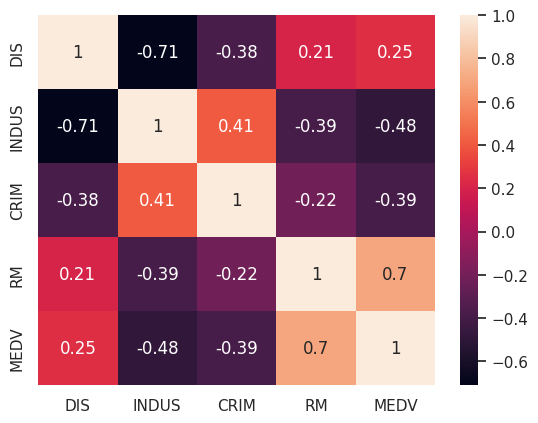

In [22]:
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

En nuestro análisis de correlación previo mencionamos que las variables que tienen la correlación más fuerte con nuestra variable de respuesta "MEDV" son la cantidad promedio de habitaciones por vivienda (RM) y la proporción de acres de negocios no minoristas por ciudad (INDUS).

###Creando el modelo con sklearn
Los pasos para crear un modelo de regresión lineal múltiple en Python son muy similares a los de una regresión lineal simple que hicimos anteriormente.

La principal diferencia radica en la selección de la variable X, donde en la regresión lineal simple se usa una única variable predictora, mientras que en la regresión lineal múltiple se usan varias variables predictoras.

In [23]:
# StandardScaler acepta arreglos de 2 dimensiones por lo cual ya no usamos el reshape(-1,1) con la variable independiente (X)
X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1,1)

In [24]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_standard = sc_x.fit_transform(X)
y_standard = sc_y.fit_transform(y)

In [25]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_standard,y_standard)

LinearRegression()

###Análisis de regresión multivariable

In [26]:
import numpy as np

# definir el rango de valores para la variable predictiva "RM"
x1_range = np.arange(
    df['RM'].min(),
    df['RM'].max())

# definir el rango de valores para la variable predictiva "INDUS"
x2_range = np.arange(
    df['INDUS'].min(),
    df['INDUS'].max())

# crear una malla de puntos que cubra los rangos de valores de ambas variables predictoras
X1, X2 = np.meshgrid(x1_range, x2_range)

El código se encarga de crear un plano de predicción para el modelo de regresión lineal múltiple. Primero, se definen los rangos de valores para cada variable predictiva "RM" e "INDUS" utilizando la función arange() de Numpy. Luego, se utiliza la función meshgrid() de Numpy para crear una malla de puntos que cubra todos los valores posibles de ambas variables predictivas.

In [27]:
# crear un dataframe con todas las combinaciones posibles de valores de ambas variables predictoras
plano = pd.DataFrame(
    {
    'RM':X1.ravel(),
    'INDUS':X2.ravel()
    })
plano.T

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
RM,3.561,4.561,5.561,6.561,7.561,8.561,3.561,4.561,5.561,6.561,...,5.561,6.561,7.561,8.561,3.561,4.561,5.561,6.561,7.561,8.561
INDUS,0.460,0.460,0.460,0.460,0.460,0.460,1.460,1.460,1.460,1.460,...,26.460,26.460,26.460,26.460,27.460,27.460,27.460,27.460,27.460,27.460


A continuación, se crea un dataframe llamado plano con todas las combinaciones posibles de valores de ambas variables predictivas, utilizando la función ravel() de Numpy para aplanar las matrices X1 y X2 y crear dos columnas con los valores correspondientes para "RM" e "INDUS

In [28]:
# utilizar los coeficientes y la intercepción del modelo de regresión lineal múltiple ajustado para hacer predicciones en el plano creado
pred = slr.predict(plano).reshape(X1.shape)

# escalar las predicciones inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV"
pred = sc_y.inverse_transform(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Finalmente, se utilizan los coeficientes y la intercepción del modelo de regresión lineal múltiple ajustado para hacer predicciones en el plano creado.

Estas predicciones se escalan inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV". El resultado es un objeto pred que contiene todos los valores predichos para el plano creado.

In [29]:
import plotly.express as px
import plotly.graph_objects as go

# PLOTTING
mesh_size = .02
margin = 0

fig = px.scatter_3d(df, x='RM', y='INDUS', z='MEDV')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=X1, y=X2, z=pred, name='pred_surface'))
fig.show()

##Proyecto práctico

###Regresión lineal para predecir los gastos médicos de pacientes

Los datos provienen de:
[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)

En este proyecto práctico, trabajaremos con un conjunto de datos proporcionado por el US Census Bureau para construir un modelo de regresión que nos permita predecir los gastos médicos de los pacientes.

Para ello, utilizaremos diferentes técnicas de análisis de datos y aprendizaje automático para preparar y explorar los datos, identificar las variables más relevantes y construir un modelo predictivo robusto.

Este tipo de análisis es de gran importancia en el ámbito de la salud, ya que nos permite identificar patrones y factores de riesgo que pueden influir en el costo de los tratamientos y contribuir a una mejor planificación y gestión de los recursos sanitarios.

***Atributos:***

Se presentan las variables del conjunto de datos de gastos médicos:

- ***age (edad)***: edad del beneficiario principal
- ***sex (sexo)***: género del contratista del seguro, femenino, masculino
- ***bmi (imc)***: índice de masa corporal, proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg/m2) utilizando la relación entre altura y peso, idealmente de 18.5 a 24.9
- ***children (hijos)***: número de hijos cubiertos por el seguro médico / número de dependientes
- ***smoker (fumador)***: fumador
- ***region (región)***: área de residencia del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.
- ***charges (gastos médicos)***: costos médicos individuales facturados por el seguro médico

###Configuracion inicial

In [30]:
!pip install setuptools==58 # para que no haya conflictos con la libreria regressors
!pip install regressors

### Descargando los datos

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/gonzalezulises/detodounpoco/main/insurance.csv')
pd.concat([df.head(), df.tail()])

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


###Analizando los datos
Se explorará la distribución de la variable "Charges" para entender cómo se agrupan los costos médicos. Se identificarán patrones como valores extremos y la forma de la distribución.

(1338, 7)


<Axes: >

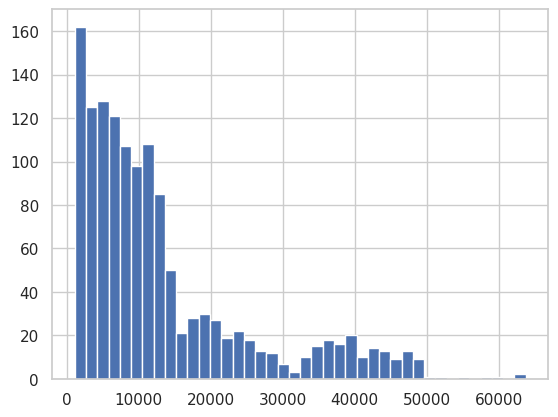

In [33]:
print(df.shape)
df.charges.hist(bins =40)

Se observa una concentración de datos entre 0 y 10000, seguida por una aparente distribución bimodal con picos en 20000 y 40000. Luego, a partir de los 50000, hay una caída en los valores hasta 60000.

In [34]:
from scipy import stats

z = np.abs(stats.zscore(df.charges))
df[z>3]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


En este caso, al ser pocos datos (7 de 1338), eliminaremos estos datos atípicos por detección de outliners con Z-score.

A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que NO SE DEBEN ELIMINAR datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos

In [35]:
df = df[z<3]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


###Análisis de correlación de los datos
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan.

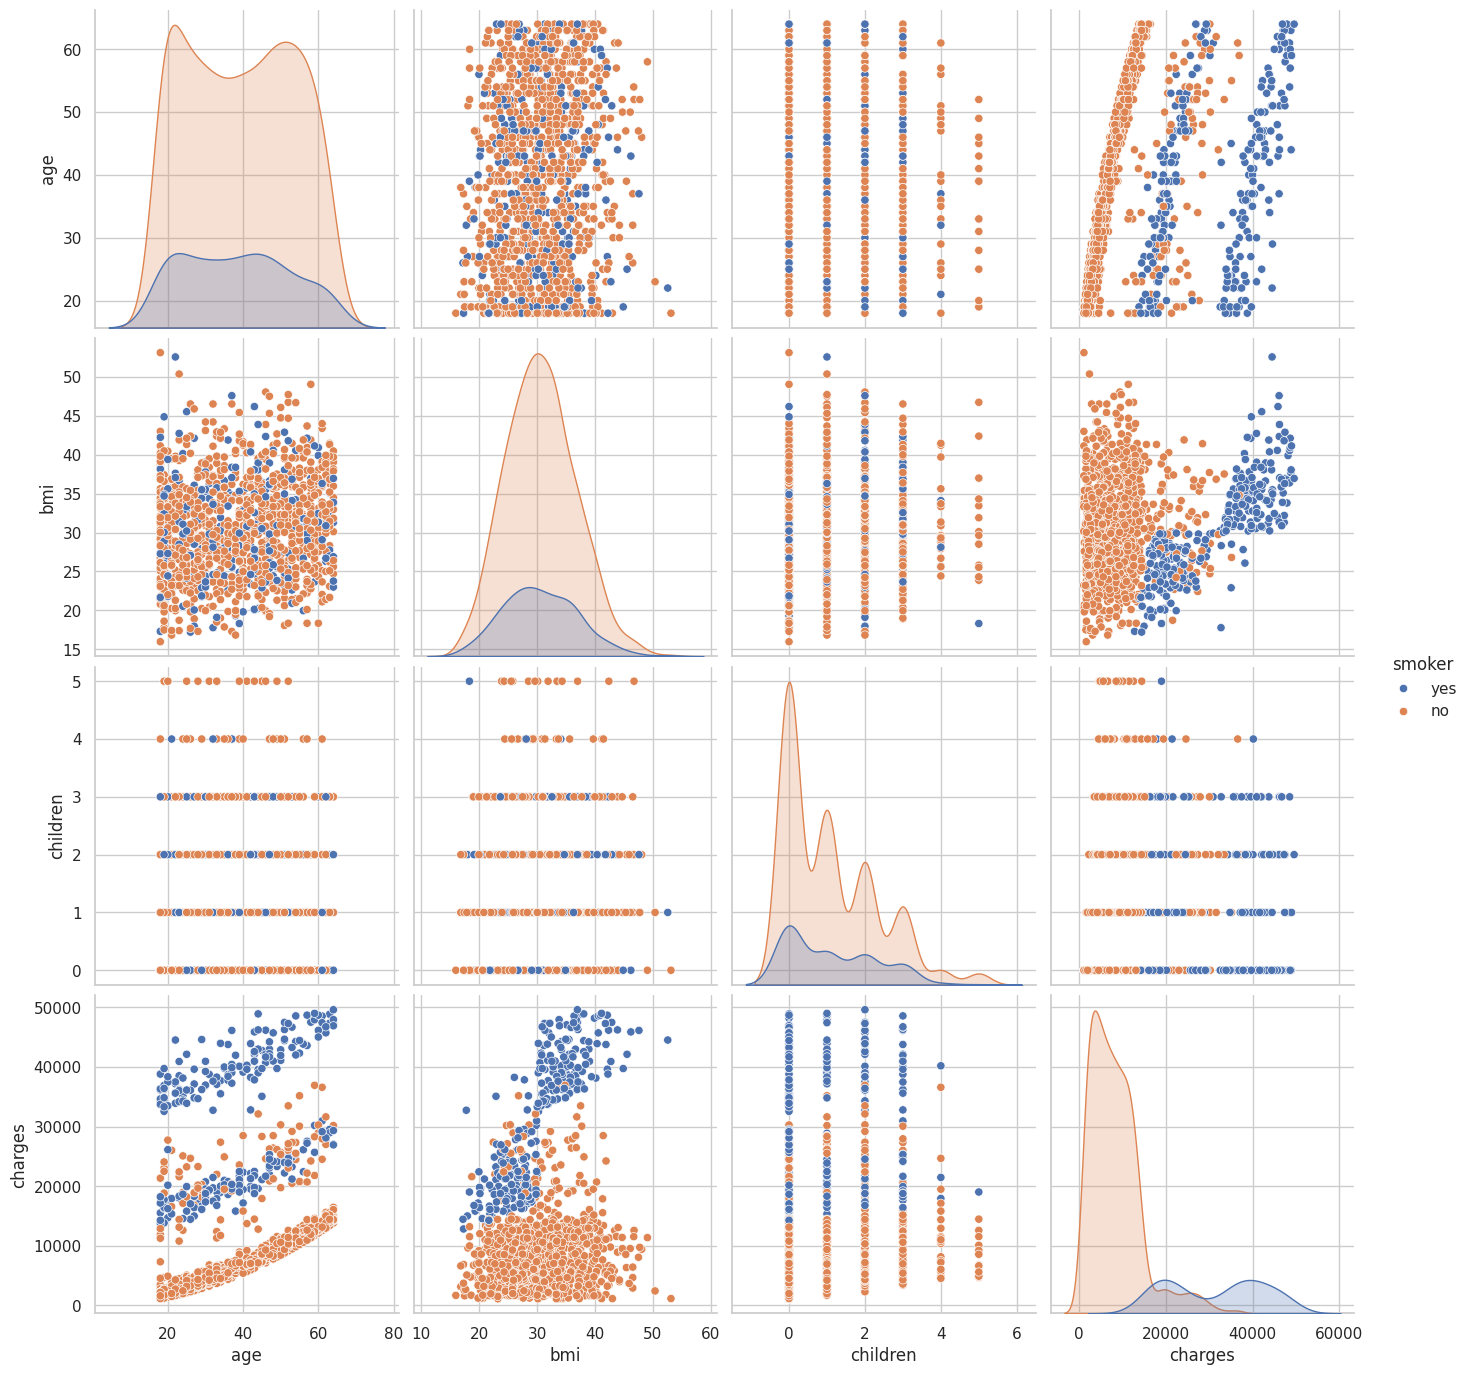

In [36]:
sns.pairplot(df, hue='smoker', height=3.5)

###Insight
- Al examinar la distribución de densidad de la variable "Charges" clasificada por "Smoker", se encontró un pico de datos entre los 5000. para los no fumadores. En el caso de los fumadores, se observó una distribución más dispersa con una tendencia bimodal, con picos en los 20000 y 40000. Estos hallazgos sugieren que el hábito de fumar puede estar asociado con mayores costos médicos y puede ser un factor importante a considerar al predecir costos médicos.

- Al analizar la relación entre "Charges" y "Age", se encontró una tendencia lineal positiva y tres subgrupos de datos. En el primer subgrupo, con costos médicos más bajos, solo se encontraron personas no fumadoras. En el segundo subgrupo, con costos médicos alrededor de los 20000 USD, se encontraron tanto personas fumadoras como no fumadoras. En el tercer subgrupo, con los costos médicos más altos, solo se encontraron personas fumadoras.

Además, se observó un patrón consistente en los tres subgrupos: a medida que la edad del paciente aumenta, también lo hacen los costos médicos. Esto sugiere que la edad es un factor importante a considerar al predecir costos médicos en este conjunto de datos.

Estos hallazgos son relevantes para entender cómo el hábito de fumar y la edad parecen ser factores significativos a considerar al predecir costos médicos en este conjunto de datos

- Al analizar la relación entre "Charges" y "BMI", se encontró que existe una fuerte correlación positiva entre ambas variables, lo que sugiere que un mayor índice de masa corporal se asocia con mayores costos médicos. Además, se encontró que la variable "Smoker" modera esta relación, ya que los fumadores con un alto índice de masa corporal presentan los costos médicos más elevados. Estos hallazgos pueden ser útiles para la predicción y gestión de costos médicos en la población estudiada.

###Análisis numérico
Transformaremos las variables categóricas ('sex', 'smoker', 'region') en variables dummy para analizar su correlación con la variable objetivo.

In [37]:
df_dummy = pd.get_dummies(df, columns=['sex','smoker','region'],drop_first=True)
df_dummy_corr = df_dummy.corr()

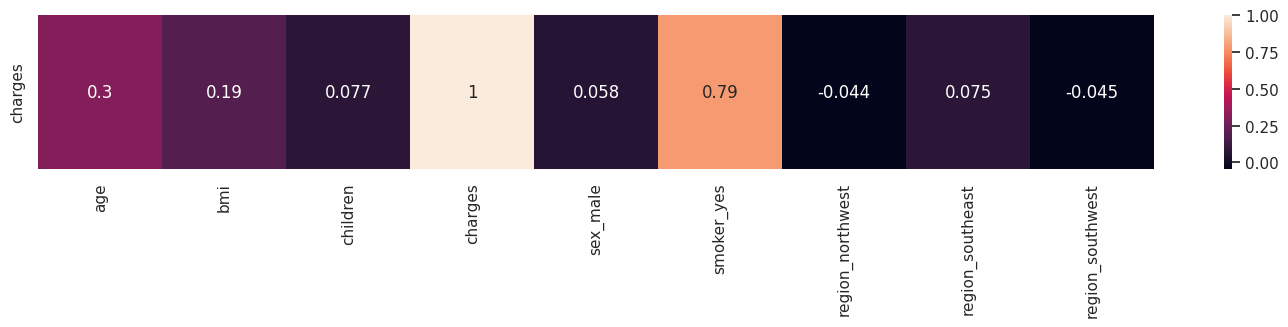

In [38]:
plt.figure(figsize=(18,2))
sns.heatmap(df_dummy_corr.iloc[3:4,:],annot=True);

###Entrenamiento del modelo
####Creando modelos
Comenzaremos a construir un modelo de regresión lineal utilizando los datos del conjunto de datos para predecir la variable objetivo mediante el ajuste de una línea recta que mejor se ajuste a los datos.

In [39]:
from sklearn.preprocessing import StandardScaler     # se utilizará para estandarizar los datos numéricos y la librería
from sklearn.linear_model import LinearRegression    # para crear el modelo de regresión lineal. Además, se importa la librería
from sklearn.model_selection import train_test_split # para dividir los datos en conjuntos de entrenamiento y prueba.

In [40]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = list(set(df_dummy.columns)-set(['charges']))

# Seleccionamos la variable objetivo
y_col = ['charges']


# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_dummy[X_cols].values
y = df_dummy[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)

In [41]:
y_pred.shape

(333, 1)

###Evaluando el modelo
####Funciones de metricas
Pasaremos a evaluar nuestro modelo de regresión lineal mediante diferentes métricas de evaluación, como el **coeficiente de determinación (R2), el error cuadrático medio (MSE) y el error absoluto promedio (MAE)**.



In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))

MAE: 0.3584
MSE: 0.2631
R^2: 0.764


###Insight
El modelo de regresión lineal que desarrollamos para predecir la variable charges ha dado buenos resultados. El error absoluto medio (MAE) es de 0.3584, el error cuadrático medio (MSE) es de 0.2631 y el coeficiente de determinación (R^2) es de 0.764, lo que significa que el modelo explica el 76.4% de la varianza en los datos.

Estos resultados indican que el modelo es adecuado para predecir los costos médicos de los pacientes en función de otras variables del conjunto de datos.

In [43]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [44]:
y_test = y_test.reshape(-1)

print('='*16,'Summary','='*16)
stats.summary(model, X_test, y_test, X_cols)

================ Summary ================
Residuals:
    Min    1Q  Median     3Q    Max
-2.0596 -0.08  0.1083 0.2242 0.9709


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.000000    0.028368  -0.0000  1.000000
bmi               0.142865    0.028179   5.0699  0.000001
sex_male          0.001681    0.028333   0.0593  0.952725
children          0.061747    0.029176   2.1164  0.035057
age               0.314215    0.028595  10.9884  0.000000
region_southeast -0.048010    0.035530  -1.3513  0.177526
region_northwest -0.017756    0.030942  -0.5739  0.566454
region_southwest -0.045264    0.033040  -1.3700  0.171618
smoker_yes        0.786134    0.026601  29.5530  0.000000
---
R-squared:  0.76398,    Adjusted R-squared:  0.75815
F-statistic: 131.10 on 8 features


Al analizar el summary de datos de nuestro modelo de regresión lineal, se obtuvo un valor de p igual a 0.00000 para la variable 'smoker_yes', un valor de p igual a 0.0000 para la variable 'age' y un valor de p igual a 0.000001 para la variable 'bmi'.

Estos valores de p son inferiores al nivel de significancia típico de 0.05, lo que indica que estas variables tienen una relación estadísticamente significativa con la variable objetivo 'charges'. Por lo tanto, podemos concluir que 'smoker_yes', 'age' y 'bmi' son variables importantes en la predicción de los costos médicos de un individuo.

Finalmente la funcion que calcula los residuales, es imporante notar que es una simple resta entre los valores reales y los predichos.

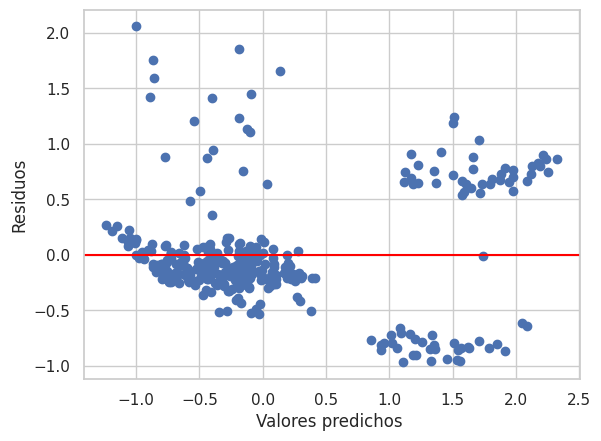

In [45]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();

Según los resultados de los residuos, la mayoría de los datos se ajustan bien al modelo, pero algunos están alejados del resultado deseado.

En este caso, el modelo está utilizando todas las variables del conjunto de datos, por lo que nos enfocaremos en las variables específicas que son relevantes para el análisis.

###Segundo modelo

In [46]:
df_second = df_dummy.copy(deep=True)
df_second['age2'] = df_second.age ** 2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso_fumador'] = df_second.sobrepeso * df_second.smoker_yes

<Axes: >

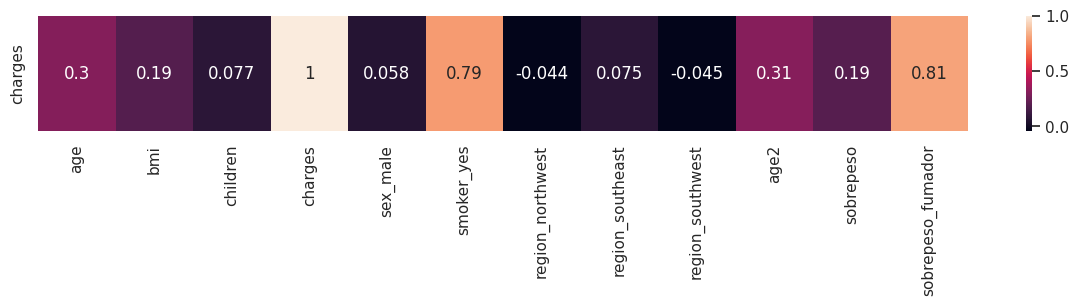

In [47]:
plt.figure(figsize=(15,1.5))
sns.heatmap(df_second.corr().iloc[3:4,:],annot=True)

Al multiplicar las variables "smoker_yes" con "bmi" logramos obtener una correlación mayor con los gastos médicos ("charges"), lo que sugiere que ambas variables están relacionadas con los costos de atención médica y podrían ser importantes en el nuevo modelo de predicción.



In [48]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = list(set(df_second.columns)-set(['charges']))

# Seleccionamos la variable objetivo
y_col = ['charges']


# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)


In [49]:
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))

MAE: 0.1986
MSE: 0.126
R^2: 0.887


Después de unir las variables "smoker_yes" y "bmi" y ajustar el modelo, obtuvimos mejores resultados en la evaluación del modelo.

Los valores fueron: MAE de 0.1986, MSE de 0.126 y R^2 de 0.887, lo que indica que el modelo se ajusta bien a los datos de entrenamiento y prueba.

In [50]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [51]:
y_test = y_test.reshape(-1)

print('='*16,'Summary','='*16)
stats.summary(model, X_test, y_test, X_cols)

================ Summary ================
Residuals:
    Min     1Q  Median     3Q    Max
-1.8908 0.0524  0.1172 0.1501 0.4418


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.000000    0.019642  -0.0000  1.000000
bmi                0.034656    0.028571   1.2130  0.225992
sex_male          -0.021589    0.019629  -1.0999  0.272192
children           0.088018    0.020430   4.3083  0.000022
sobrepeso         -0.025820    0.030024  -0.8600  0.390423
sobrepeso_fumador  0.476938    0.025132  18.9773  0.000000
age               -0.122888    0.101578  -1.2098  0.227221
age2               0.453712    0.102693   4.4181  0.000013
region_southeast  -0.032182    0.024648  -1.3057  0.192566
region_northwest  -0.013547    0.021420  -0.6325  0.527514
region_southwest  -0.055130    0.022875  -2.4101  0.016493
smoker_yes         0.463998    0.024604  18.8587  0.000000
---
R-squared:  0.88703,    Adjusted R-squared:  0.88316
F-statistic: 229.13 on 11 feature

En nuestro resumen estadístico, encontramos que la nueva variable que unió 'smoker_yes' con 'bmi' tuvo un p-value de 0.000000 y un t-value de 18.9773, lo que indica que es una variable altamente significativa para el modelo. Además, las otras variables que se analizaron previamente en el modelo aún siguen siendo relevantes para predecir los gastos médicos.



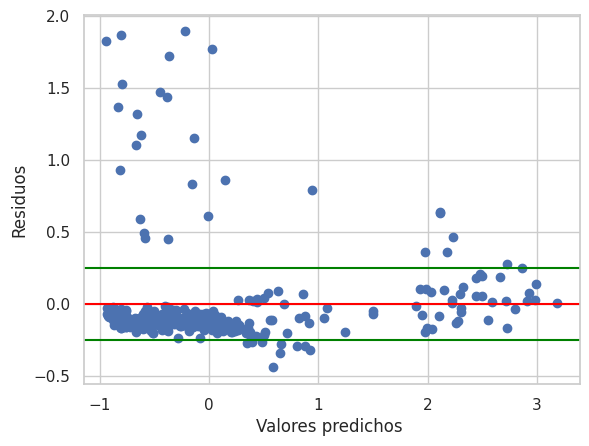

In [52]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.axhline(0.25,0,color='green')
plt.axhline(-0.25,0,color='green')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();

Después de añadir la nueva variable, pudimos observar una mejora en la dispersión de los datos en la gráfica de residuales. En comparación con el modelo anterior, los residuos se distribuyeron de manera más uniforme alrededor del eje x, lo que indica que el modelo ajustado se ajusta mejor a los parámetros esperados. Esto sugiere que la adición de la nueva variable ayudó a mejorar la capacidad predictiva de nuestro modelo de regresión lineal.



###Tercer modelo
Para el último modelo, usaremos únicamente las variables del análisis anterior donde las variables tengan un p value menor a 0.05.

Esto nos permitirá tener un modelo más sencillo y eficiente, al mismo tiempo que nos aseguramos de que las variables que incluimos sean estadísticamente relevantes en la predicción de los gastos médicos.

In [53]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = ['sobrepeso_fumador','smoker_yes','children','age2']

# Seleccionamos la variable objetivo
y_col = ['charges']


# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)


In [54]:
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))


MAE: 0.1981
MSE: 0.1265
R^2: 0.8865


Logramos obtener resultados similares en las pruebas MAE, MSE y R^2 al modelo anterior, utilizando solo 4 variables.

In [55]:
# model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [56]:
y_test = y_test.reshape(-1)

print('='*16,'Summary','='*16)
stats.summary(model, X_test, y_test, X_cols)

================ Summary ================
Residuals:
    Min     1Q  Median     3Q    Max
-1.9344 0.0688  0.1108 0.1429 0.4081


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.019565   0.0000  1.000000
sobrepeso_fumador  0.472145    0.022467  21.0147  0.000000
smoker_yes         0.465592    0.023639  19.6955  0.000000
children           0.081232    0.020122   4.0370  0.000067
age2               0.333654    0.019783  16.8655  0.000000
---
R-squared:  0.88650,    Adjusted R-squared:  0.88511
F-statistic: 640.46 on 4 features


Después de ajustar nuestro modelo y realizar un nuevo análisis del resumen, podemos observar que todas nuestras variables son estadísticamente significativas con la variable objetivo, es decir, todas las variables están relacionadas con los cargos médicos y son útiles para hacer predicciones.

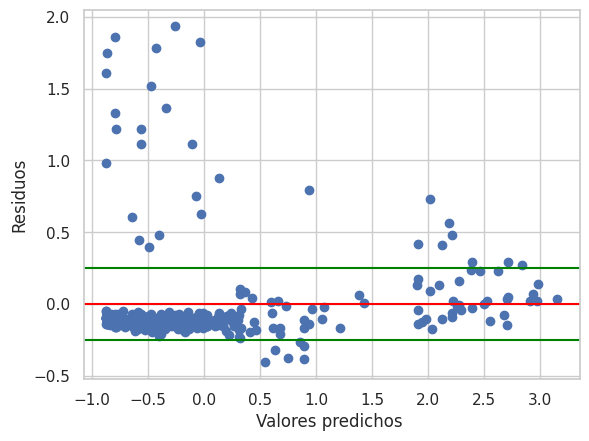

In [57]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.axhline(0.25,0,color='green')
plt.axhline(-0.25,0,color='green')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();

Se consiguio que la grafica de residuos mostrara una mayor concentración de los datos dentro del rango de ±0.25 del eje X. Esto indica que el modelo se ajusta mejor a los datos y las predicciones serán más precisas.

###Insight
Después de realizar un análisis exhaustivo del conjunto de datos del US Census Bureau y aplicar diversas técnicas estadísticas, pudimos construir un modelo de regresión lineal con solo 4 variables que logró capturar la mayor cantidad de valor de los datos y ajustarse a las predicciones. A través de la evaluación de nuestro modelo, logramos demostrar que es posible obtener resultados significativos y útiles con un número reducido de variables.

Este enfoque nos permitió optimizar nuestro modelo y generar predicciones más precisas, lo que puede ser de gran utilidad para la toma de decisiones futuras.

###Conclusiones
- Existe una fuerte correlación entre el gasto médico y ciertas características personales, como el tabaquismo, la edad y el índice de masa corporal (IMC).

- Los resultados sugieren que los fumadores tienen una tendencia a gastar más en atención médica en comparación con los no fumadores, y que la edad y el IMC también son factores importantes a considerar.

-  La inclusión de estas variables en un modelo de regresión lineal puede mejorar la capacidad predictiva del modelo y ayudar a los profesionales de la salud a comprender mejor los factores que influyen en el costo de la atención médica.